[ 0 10 20 30 40 50 60 70 80 90]


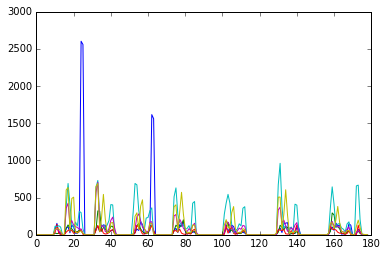

In [17]:
# --------------------------------------------------
#
# per-dimension energy bins
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)[:4500]
W = [(s, s + window_len) for s in range(0, x.shape[0]-inc, inc)]

# energy windows
results = []
for (start, stop) in W:
    window = signal.get_window('boxcar', window_len)
    _, energy = signal.welch(x[start:stop], fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))

# plot results
plt.plot(results)
plt.show()

((4500,), (4500, 3))
[44950 44960 44970 44980 44990]
(179, [43750, 44000, 44250, 44500, 44750])


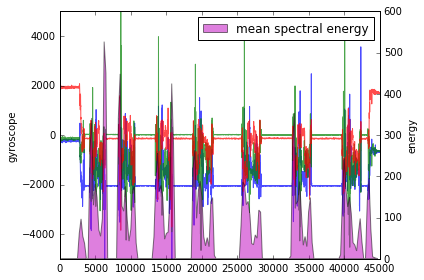

In [6]:
# --------------------------------------------------
#
# energy overlayed with the signals
#
# --------------------------------------------------

# %matplotlib tk
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)[:4500]
W = [(s, s + window_len, (s + s + window_len)/2 * 10) for s in range(0, x.shape[0]-inc, inc)]
t = np.arange(4500) * 10

# energy windows
results = []
rt = []
for (start, stop, _t) in W:
    window = signal.get_window('boxcar', window_len)
    _, energy = signal.welch(x[start:stop], fs, window=window, axis=0)
    results.append(np.mean(energy))
    rt.append(_t)

print(t.shape, x[:,:-3].shape)
print(t[-5:])
print(len(rt), rt[-5:])

# plot results
fig, ax1 = plt.subplots()
ax1.plot(t, x[:,:-3], alpha=.7)
ax1.set_ylabel('gyroscope')
ax1.set_ylim(-5000, 5000)
ax2 = ax1.twinx()
ax2.fill(rt, results, 'm', alpha=.5)
ax2.set_ylabel('energy')
ax2.legend(['mean spectral energy'])
fig.tight_layout()
plt.show()